# 02 — Market Overview

High-level analysis of the **Austin, TX** short-term rental market: pricing, supply composition,
host concentration, and guest satisfaction.

**Key Questions:**
- What is the Average Daily Rate (ADR) by room type?
- How is the supply distributed across property types?
- How concentrated is the market (top hosts)?
- What do review scores tell us about quality?

## Setup

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_listings, load_config
from src.data_cleaner import clean_listings
from src.analyzers.market_overview import MarketOverviewAnalyzer
from src.visualizations.charts import ChartGenerator

config = load_config()
charts = ChartGenerator()

%matplotlib inline

## Data Loading & Cleaning

In [2]:
raw = load_listings('../data/sample/listings_sample.csv')
listings = clean_listings(raw)
print(f'Active listings after cleaning: {len(listings):,}')

analyzer = MarketOverviewAnalyzer(listings, config)

Active listings after cleaning: 215


## Executive Summary

In [3]:
summary = analyzer.get_summary()

print('═' * 50)
print('    AUSTIN STR MARKET — EXECUTIVE SUMMARY')
print('═' * 50)
print(f"  Total Active Listings:  {summary['total_listings']:,}")
print(f"  Average Daily Rate:     ${summary['adr_mean']:,.0f}")
print(f"  Median Daily Rate:      ${summary['adr_median']:,.0f}")
print(f"  Unique Hosts:           {summary['unique_hosts']:,}")
print(f"  Top 10 Host Share:      {summary['top_10_host_share']:.1f}%")
print(f"  Average Rating:         {summary['avg_rating']:.2f} / 5.0")
if summary['pct_superhost']:
    print(f"  Superhost Rate:         {summary['pct_superhost']:.1f}%")
print('═' * 50)

══════════════════════════════════════════════════
    AUSTIN STR MARKET — EXECUTIVE SUMMARY
══════════════════════════════════════════════════
  Total Active Listings:  215
  Average Daily Rate:     $194
  Median Daily Rate:      $130
  Unique Hosts:           195
  Top 10 Host Share:      13.5%
  Average Rating:         4.81 / 5.0
  Superhost Rate:         59.2%
══════════════════════════════════════════════════


## Average Daily Rate (ADR) by Room Type

,adr_mean,adr_median,adr_std,listings
room_type,,,,
Hotel room,$345,$314,$188,4
Entire home/apt,$228,$152,$217,164
Private room,$77,$55,$60,37
Shared room,$20,$18,$8,10


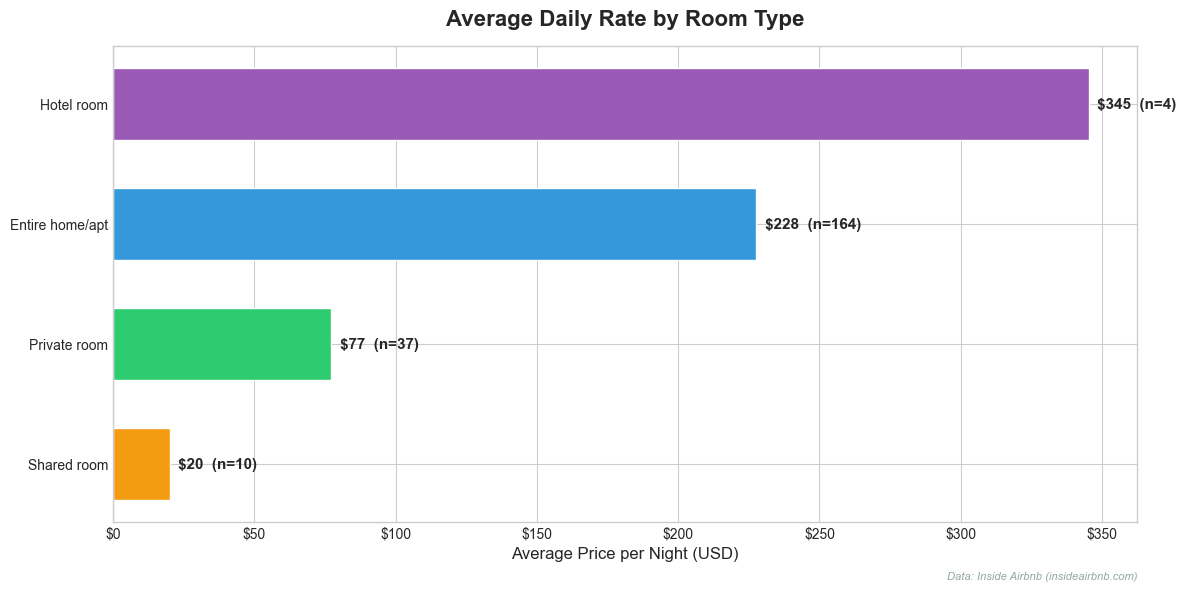

In [4]:
adr = analyzer.get_adr_by_room_type()
display(adr.style.format({'adr_mean': '${:,.0f}', 'adr_median': '${:,.0f}', 'adr_std': '${:,.0f}'}))

charts.plot_adr_by_room_type(listings, save_as='adr_by_room_type')
plt.show()

## Price Distribution

Mean:   $194
Median: $130
Std:    $205
Q25:    $72
Q75:    $220


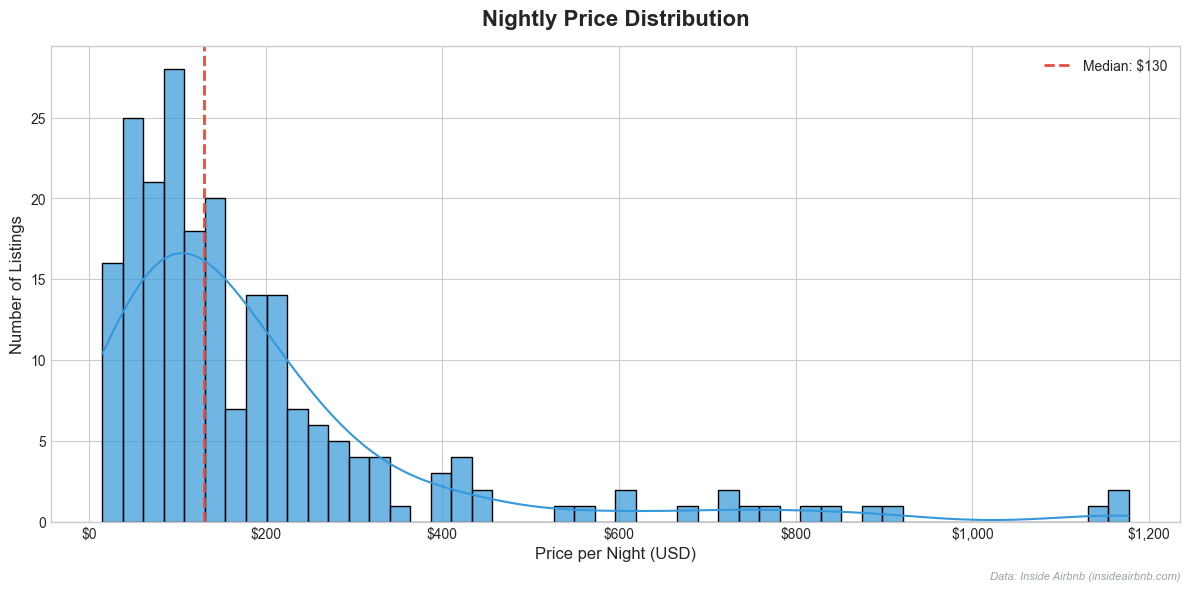

In [5]:
price_stats = analyzer.get_price_distribution()
print(f"Mean:   ${price_stats['mean']:,.0f}")
print(f"Median: ${price_stats['median']:,.0f}")
print(f"Std:    ${price_stats['std']:,.0f}")
print(f"Q25:    ${price_stats['q25']:,.0f}")
print(f"Q75:    ${price_stats['q75']:,.0f}")

charts.plot_price_distribution(listings, save_as='price_distribution')
plt.show()

/Users/alvaroquintasmartinsfaustino/Projects/airbnb/airbnb-business/airbnb-market-analyzer/src/visualizations/charts.py:495: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, order=order, palette="muted",


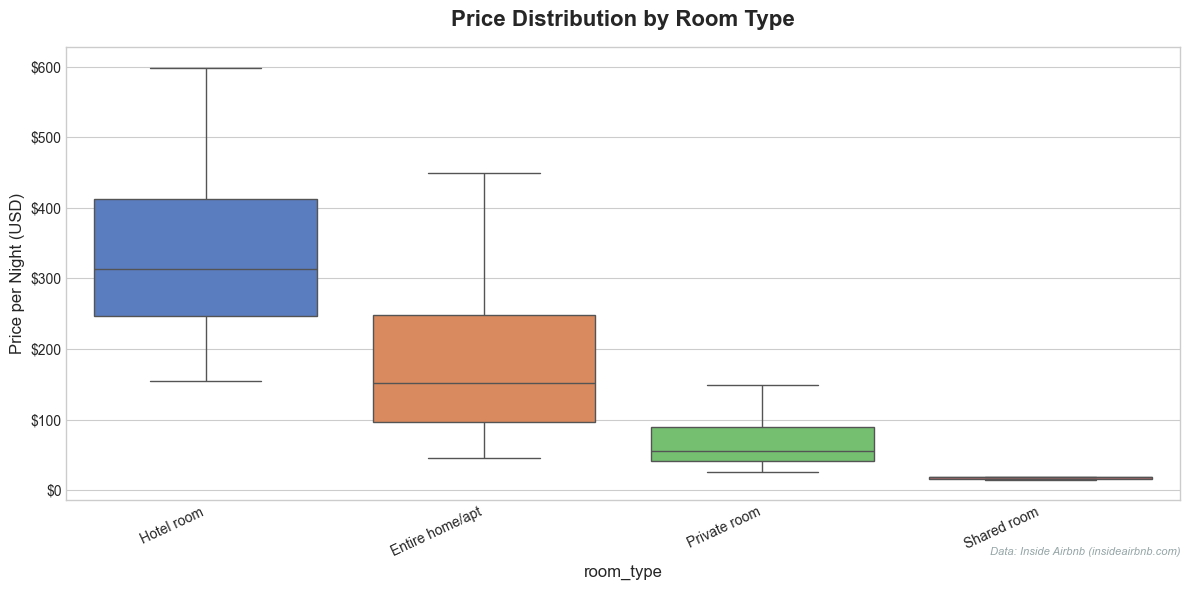

In [6]:
charts.plot_boxplot_by_group(listings, x='room_type', y='price',
                             title='Price Distribution by Room Type',
                             save_as='price_boxplot_room_type')
plt.show()

## Supply Breakdown

,count,pct
room_type,,
Entire home/apt,164,76.3%
Private room,37,17.2%
Shared room,10,4.7%
Hotel room,4,1.9%


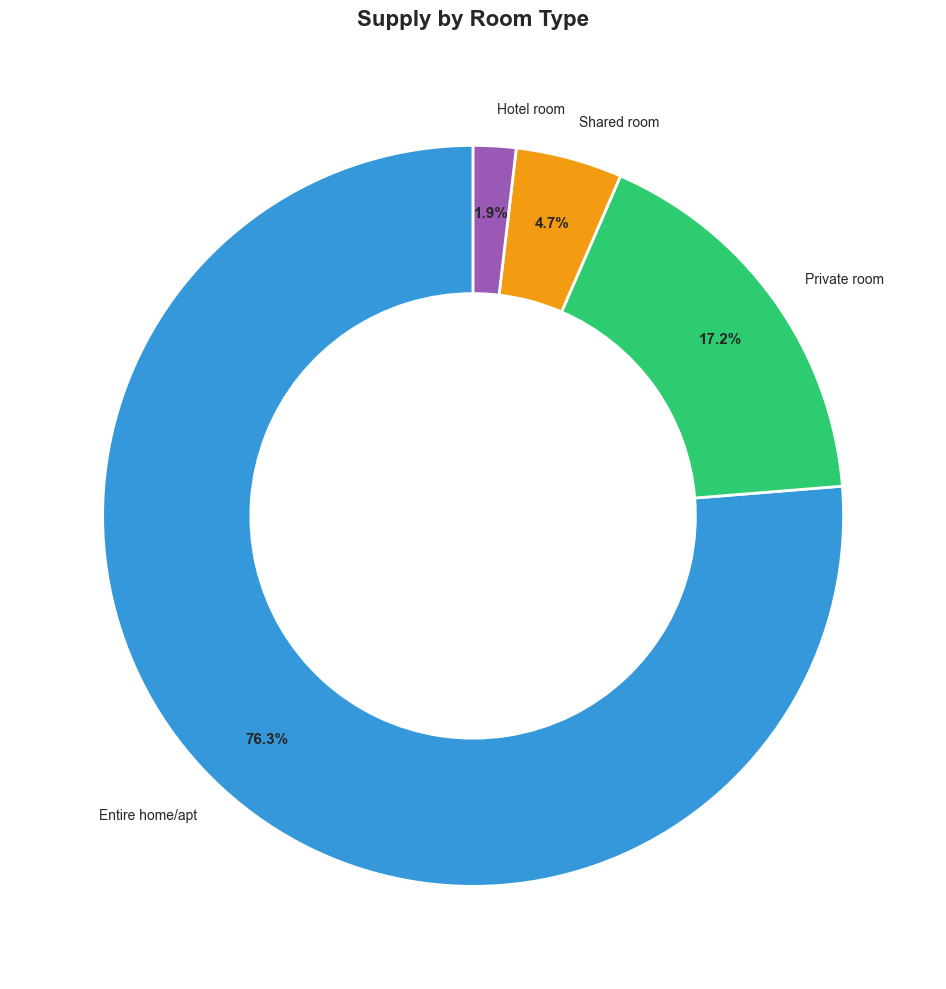

In [7]:
supply = analyzer.get_supply_by_room_type()
display(supply.style.format({'pct': '{:.1f}%'}))

charts.plot_supply_breakdown(listings, save_as='supply_by_room_type')
plt.show()

## Market Concentration — Top Hosts

In [8]:
concentration = analyzer.get_market_concentration()
print(f"Unique hosts: {concentration['unique_hosts']:,}")
print(f"HHI (Herfindahl Index): {concentration['hhi']:.1f}")
print(f"Top 10 hosts control: {concentration['top_10_host_share_pct']:.1f}% of listings")

top_hosts = analyzer.get_top_hosts(10)
display(top_hosts[['host_name', 'listings', 'avg_price', 'avg_rating', 'market_share_pct']].style.format(
    {'avg_price': '${:,.0f}', 'avg_rating': '{:.2f}', 'market_share_pct': '{:.1f}%'}
))

Unique hosts: 195
HHI (Herfindahl Index): 68.1
Top 10 hosts control: 13.5% of listings


,host_name,listings,avg_price,avg_rating,market_share_pct
0,Martin,9,$18,4.54,4.2%
1,Bill,3,$209,4.95,1.4%
2,Vacasa Texas,3,$224,4.79,1.4%
3,Marcella,2,$68,4.89,0.9%
4,Portoro,2,$293,4.92,0.9%
5,Kasa,2,$516,4.68,0.9%
6,Josh,2,$46,5.00,0.9%
7,Blueground,2,$116,2.00,0.9%
8,RoomPicks By Victoria,2,$216,nan,0.9%
9,Jon - Austin Vacay,2,$284,4.85,0.9%


## Rating Distribution

Average rating: 4.81
Listings rated ≥ 4.0: 97.4%
Listings rated ≥ 4.5: 92.6%
Listings with ratings: 190 / 215


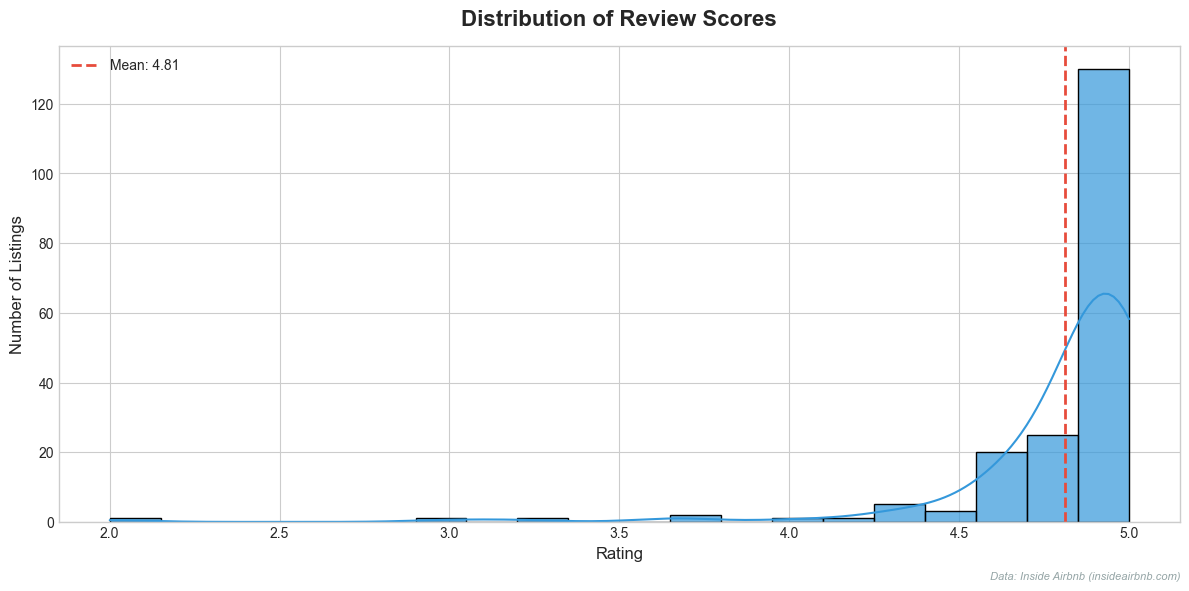

In [9]:
ratings = analyzer.get_rating_distribution()
print(f"Average rating: {ratings['mean']:.2f}")
print(f"Listings rated ≥ 4.0: {ratings['pct_above_4']:.1f}%")
print(f"Listings rated ≥ 4.5: {ratings['pct_above_4_5']:.1f}%")
print(f"Listings with ratings: {ratings['total_with_rating']} / {ratings['total_listings']}")

charts.plot_rating_distribution(listings, save_as='rating_distribution')
plt.show()

## Key Findings

1. **Entire homes dominate** the Austin market, with significantly higher ADR than private rooms
2. **Median price** is a better indicator than mean — the distribution is right-skewed with a long tail of luxury listings
3. **Market is fragmented** — the top 10 hosts control a relatively small share, suggesting many individual operators
4. **Quality is high** — the vast majority of listings have ratings above 4.5, indicating a mature, competitive market
5. **Superhost presence** is strong, suggesting guests value quality and hosts invest in maintaining standards

**Next:** [03 — Seasonality](03_seasonality.ipynb) to understand temporal pricing patterns.